## **DATA COLLECTION**

**Loading Data**

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('Crop Production data.csv')

In [ ]:
data.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


## **DATA PREPROCESSING**

**Data Cleaning**

In [ ]:
data.isnull()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
246086,False,False,False,False,False,False,False
246087,False,False,False,False,False,False,False
246088,False,False,False,False,False,False,False
246089,False,False,False,False,False,False,False


In [ ]:
data.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [ ]:
data.fillna(0,inplace=True)

In [ ]:
data.isnull().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

**Classified into Categorical and Numerical Columns**

In [ ]:
numerical_columns=[]
categorical_columns=[]
for column in data.columns:
  if data[column].dtype == 'object':
    categorical_columns.append(column)
  else:
    numerical_columns.append(column)

print("Numerical Columns:",numerical_columns)
print("categorical Columns :",categorical_columns)

Numerical Columns: ['Crop_Year', 'Area', 'Production']
categorical Columns : ['State_Name', 'District_Name', 'Season', 'Crop']


**Outlier Detection And Removal**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
def boxplot(column):
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=data[column])
    plt.title(f'Box Plot of {column}')
    plt.show()

Before Outlier Removing:  Crop_Year


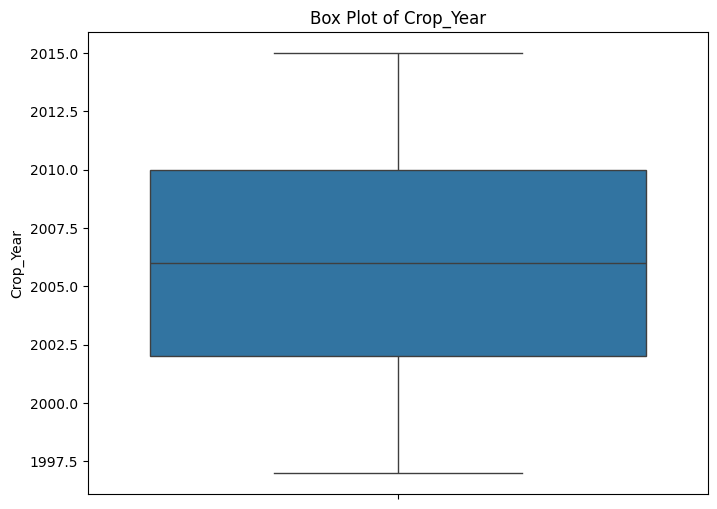

After Outlier Removing:  Crop_Year


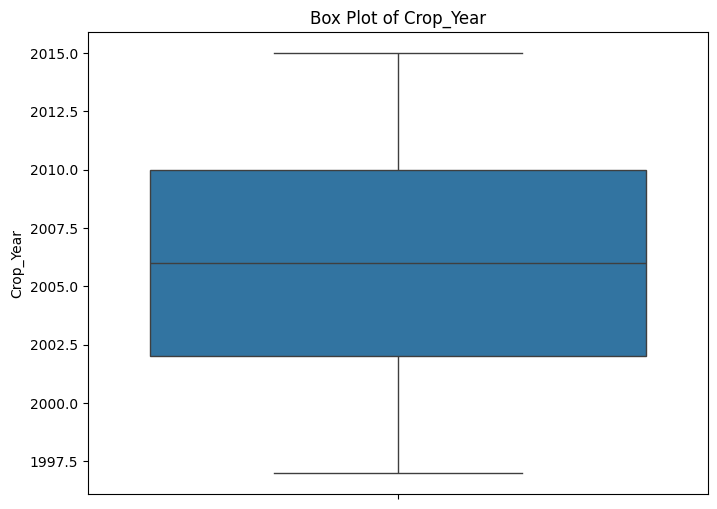

Before Outlier Removing:  Area


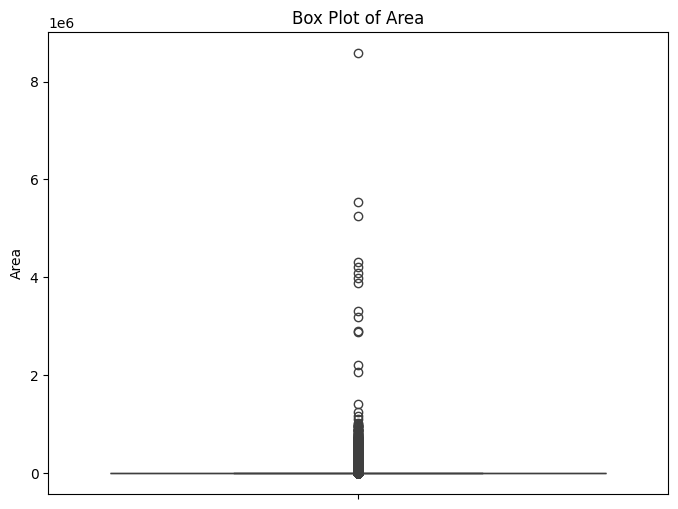

After Outlier Removing:  Area


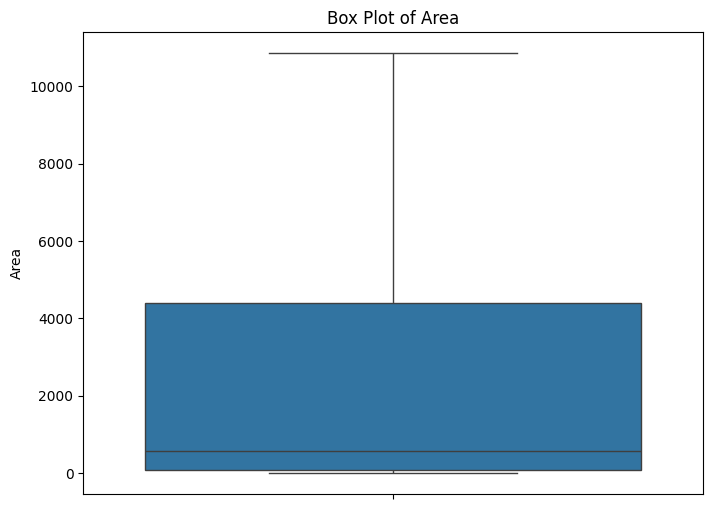

Before Outlier Removing:  Production


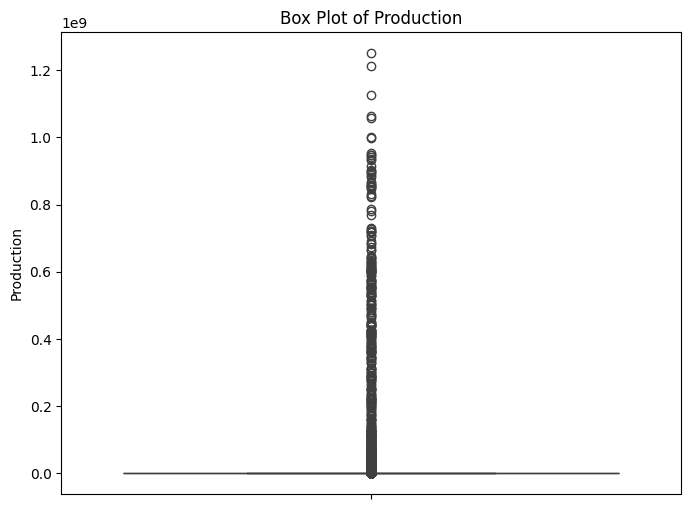

After Outlier Removing:  Production


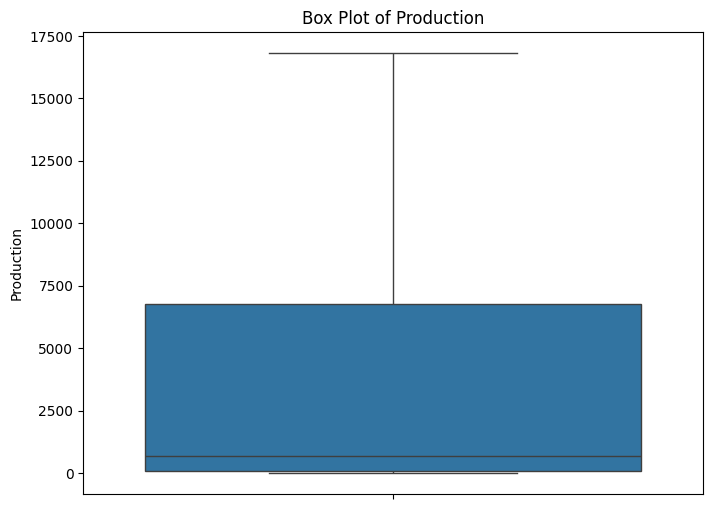

In [ ]:
#outlier is removed using iqr method
for column in numerical_columns:

    print("Before Outlier Removing: ",column)

    boxplot(column)

    print("After Outlier Removing: ",column)

    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    data.loc[(data[column] < lower_bound),column] = lower_bound
    data.loc[(data[column] > upper_bound),column] = upper_bound

    boxplot(column)



## **DATA VISUALIZATION**

**Crop production over the years**

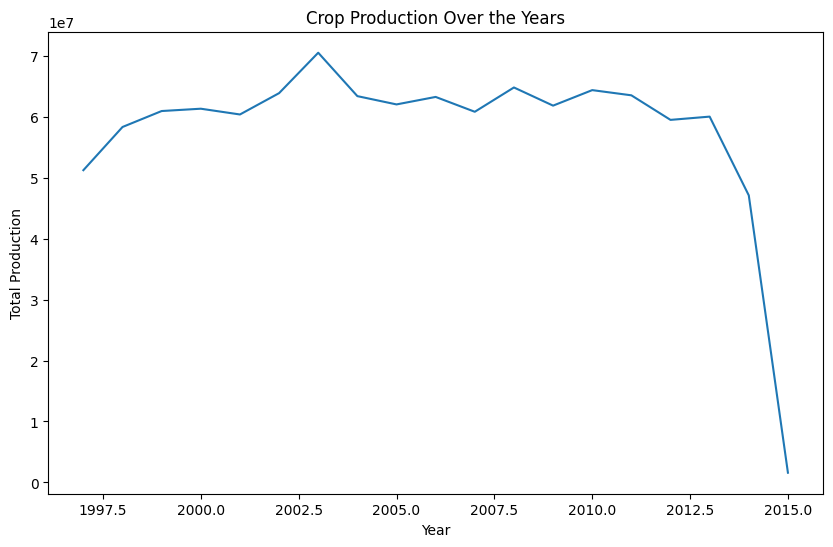

In [ ]:
# Crop production over the years
crop_year = data.groupby('Crop_Year')
crop_year = crop_year['Production'].sum()

plt.figure(figsize=(10, 6))
sns.lineplot(x=crop_year.index, y=crop_year.values)
plt.title('Crop Production Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Production')
plt.show()

**Top Crops by Production**

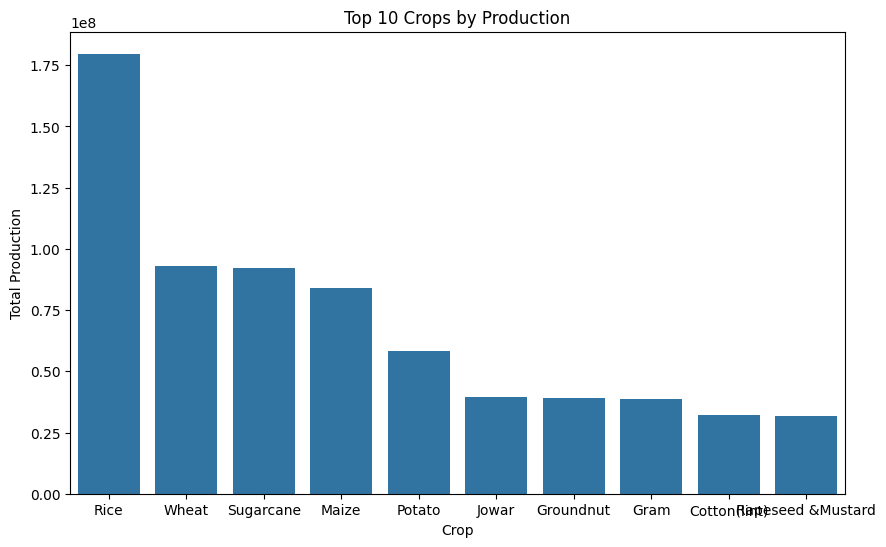

In [ ]:
# Top crops by production
top_crops = data.groupby('Crop')['Production'].sum()
top_crops = top_crops.sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_crops.index, y=top_crops.values)
plt.title('Top 10 Crops by Production')
plt.xlabel('Crop')
plt.ylabel('Total Production')
plt.show()

**Crop Production by Season**

In [ ]:
data['Season'] = data['Season'].astype(str)
data['State_Name'] = data['State_Name'].astype(str)
data['District_Name'] = data['District_Name'].astype(str)
data['Crop'] = data['Crop'].astype(str)

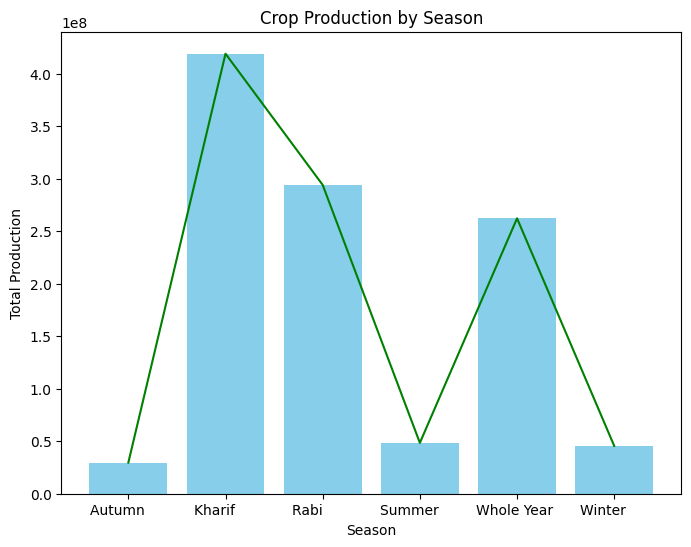

In [ ]:
season_crop = data.groupby('Season')
season_crop = season_crop['Production'].sum()

plt.figure(figsize=(8,6))
plt.bar(season_crop.index,season_crop.values,color='skyblue')
sns.lineplot(x=season_crop.index,y=season_crop.values,color='green')
plt.title('Crop Production by Season')
plt.xlabel('Season')
plt.ylabel('Total Production')
plt.show()


**Total Crop Production by State**

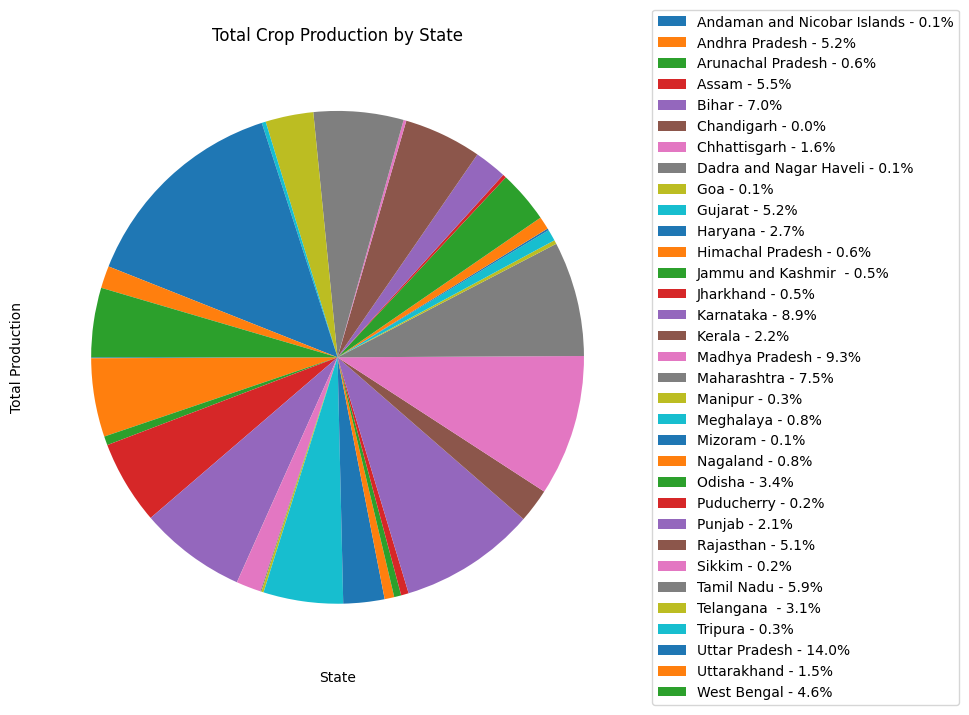

In [ ]:
state_crops = data.groupby(['State_Name','Crop'])['Production'].sum()


state_production = state_crops.groupby('State_Name').sum()

# Plotting
plt.figure(figsize=(15, 8))
patches, _ = plt.pie(state_production.values, labels=None, autopct=None, startangle=180)  # Disable labels and autopct
plt.title('Total Crop Production by State')
plt.xlabel('State')
plt.ylabel('Total Production')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Calculate percentages manually
percentages = (state_production.values / state_production.values.sum()) * 100
legend_labels = [f'{state} - {percent:.1f}%' for state, percent in zip(state_production.index, percentages)]

# Create a custom legend with state names, colors, and percentages
plt.legend(patches, legend_labels, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()


## **FEATURE ENGINEERING**

In [ ]:
categorical_columns.pop(0)

'State_Name'

In [ ]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [ ]:
label = LabelEncoder()
scalerx = StandardScaler()
scalery = StandardScaler()

In [ ]:
encoding_mapping = {}
for column in categorical_columns:
  print(column)
  data[column] = label.fit_transform(data[column])
  encoding_mapping[column] = dict(zip(label.classes_, label.transform(label.classes_)))

District_Name
Season
Crop


In [ ]:
encoding_mapping

{'District_Name': {'24 PARAGANAS NORTH': 0,
  '24 PARAGANAS SOUTH': 1,
  'ADILABAD': 2,
  'AGAR MALWA': 3,
  'AGRA': 4,
  'AHMADABAD': 5,
  'AHMEDNAGAR': 6,
  'AIZAWL': 7,
  'AJMER': 8,
  'AKOLA': 9,
  'ALAPPUZHA': 10,
  'ALIGARH': 11,
  'ALIRAJPUR': 12,
  'ALLAHABAD': 13,
  'ALMORA': 14,
  'ALWAR': 15,
  'AMBALA': 16,
  'AMBEDKAR NAGAR': 17,
  'AMETHI': 18,
  'AMRAVATI': 19,
  'AMRELI': 20,
  'AMRITSAR': 21,
  'AMROHA': 22,
  'ANAND': 23,
  'ANANTAPUR': 24,
  'ANANTNAG': 25,
  'ANJAW': 26,
  'ANUGUL': 27,
  'ANUPPUR': 28,
  'ARARIA': 29,
  'ARIYALUR': 30,
  'ARWAL': 31,
  'ASHOKNAGAR': 32,
  'AURAIYA': 33,
  'AURANGABAD': 34,
  'AZAMGARH': 35,
  'BADGAM': 36,
  'BAGALKOT': 37,
  'BAGESHWAR': 38,
  'BAGHPAT': 39,
  'BAHRAICH': 40,
  'BAKSA': 41,
  'BALAGHAT': 42,
  'BALANGIR': 43,
  'BALESHWAR': 44,
  'BALLIA': 45,
  'BALOD': 46,
  'BALODA BAZAR': 47,
  'BALRAMPUR': 48,
  'BANAS KANTHA': 49,
  'BANDA': 50,
  'BANDIPORA': 51,
  'BANGALORE RURAL': 52,
  'BANKA': 53,
  'BANKURA': 54,
  'B

In [ ]:
# Create a new dictionary with stripped keys for the 'Season' key
encoding_mapping['Season'] = {key.strip(): value for key, value in encoding_mapping['Season'].items()}

In [ ]:
data.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,427,2000,1,2,1254.0,2000.0
1,Andaman and Nicobar Islands,427,2000,1,74,2.0,1.0
2,Andaman and Nicobar Islands,427,2000,1,95,102.0,321.0
3,Andaman and Nicobar Islands,427,2000,4,7,176.0,641.0
4,Andaman and Nicobar Islands,427,2000,4,22,720.0,165.0


## **MODEL SELECTION and MODEL EVALUATION**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Prepare the data for modeling
X = data.drop(['Production','State_Name'], axis=1)
y = data['Production']

In [ ]:
X = scalerx.fit_transform(X)

In [ ]:

# Convert the Pandas Series to a NumPy array
y_array = y.values

# Reshape the NumPy array to a 2D array with one column
y_reshaped = y_array.reshape(-1, 1)

# Use the reshaped array for fitting and transforming
y = scalery.fit_transform(y_reshaped)


NameError: name 'y' is not defined

In [ ]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

 **Linear Regression**

In [ ]:
# Initialize the models
linear_model = LinearRegression()

# Train the models
linear_model.fit(X_train, y_train)

# Make predictions
y_linear_pred = linear_model.predict(X_test)


In [ ]:
y_linear_pred

array([[-0.40203225],
       [-0.39918562],
       [-0.50805336],
       ...,
       [-0.38652771],
       [ 0.30390207],
       [-0.64703006]])

In [ ]:
# Evaluate the models
mse_lr = mean_squared_error(y_test, y_linear_pred)

r2_lr = r2_score(y_test, y_linear_pred)

# Display the results
print(f'Linear Regression - MSE: {mse_lr}, R2: {r2_lr}')

Linear Regression - MSE: 0.30515600146151817, R2: 0.6916625164571604


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  int64  
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  int64  
 4   Crop           246091 non-null  int64  
 5   Area           246091 non-null  float64
 6   Production     246091 non-null  float64
dtypes: float64(2), int64(4), object(1)
memory usage: 13.1+ MB


**Predicted vs Actual plot**

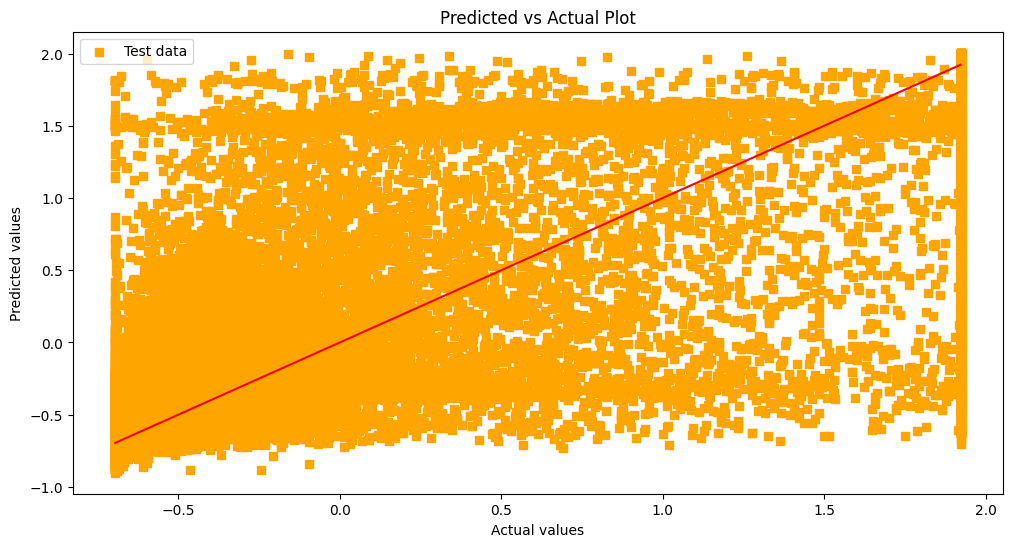

In [ ]:
# Predicted vs Actual plot
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_linear_pred, c='orange', marker='s', label='Test data')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.legend(loc='upper left')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red')
plt.title('Predicted vs Actual Plot')
plt.show()

**Decision Tree Regressor**

In [ ]:
decision_model = DecisionTreeRegressor()

decision_model.fit(X_train, y_train)

y_decision_pred = decision_model.predict(X_test)

In [ ]:
y_decision_pred

array([-0.56439278, -0.6952307 , -0.66361153, ..., -0.69180399,
        0.38729727, -0.66407881])

In [ ]:
mse_dt = mean_squared_error(y_test, y_decision_pred)

r2_dt = r2_score(y_test, y_decision_pred)


print(f'Decision Tree - MSE: {mse_dt}, R2: {r2_dt}')

Decision Tree - MSE: 0.10304986885556777, R2: 0.8958757583328988


**Predicted vs Actual plot**

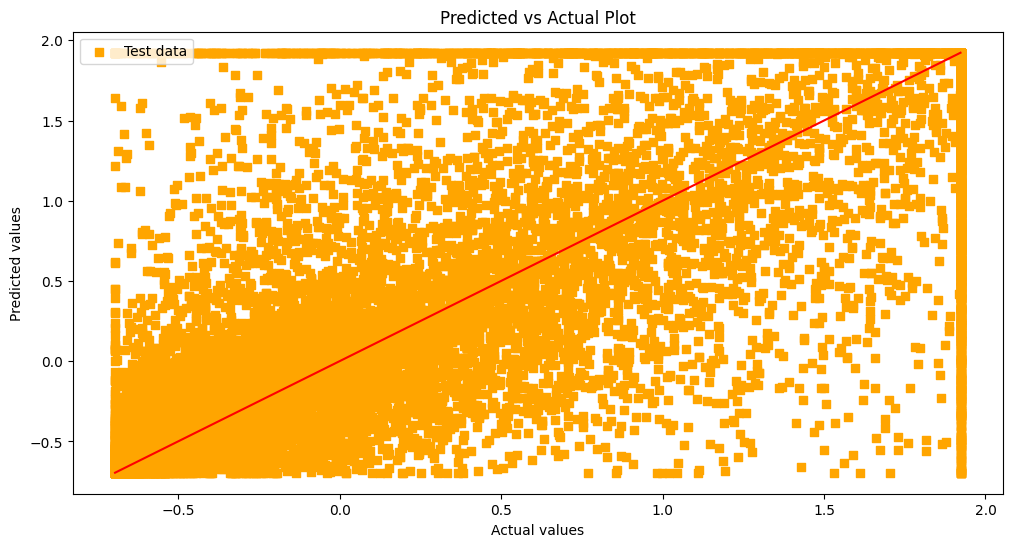

In [ ]:
# Predicted vs Actual plot
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_decision_pred, c='orange', marker='s', label='Test data')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.legend(loc='upper left')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red')
plt.title('Predicted vs Actual Plot')
plt.show()

**Random Forest Regressor**

In [ ]:
random_model = RandomForestRegressor()

random_model.fit(X_train, y_train)

y_random_pred = random_model.predict(X_test)

<ipython-input-118-bf93474fa3dc>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_model.fit(X_train, y_train)


In [ ]:
y_random_pred

array([-0.6039767 , -0.64547023, -0.6698187 , ..., -0.69113578,
        0.09842897, -0.66892916])

In [ ]:
mse_rf = mean_squared_error(y_test, y_random_pred)

r2_rf = r2_score(y_test, y_random_pred)

print(f'Random Forest - MSE: {mse_rf}, R2: {r2_rf}')

Random Forest - MSE: 0.060001864417535924, R2: 0.939372570771102


**Predicted vs Actual plot**

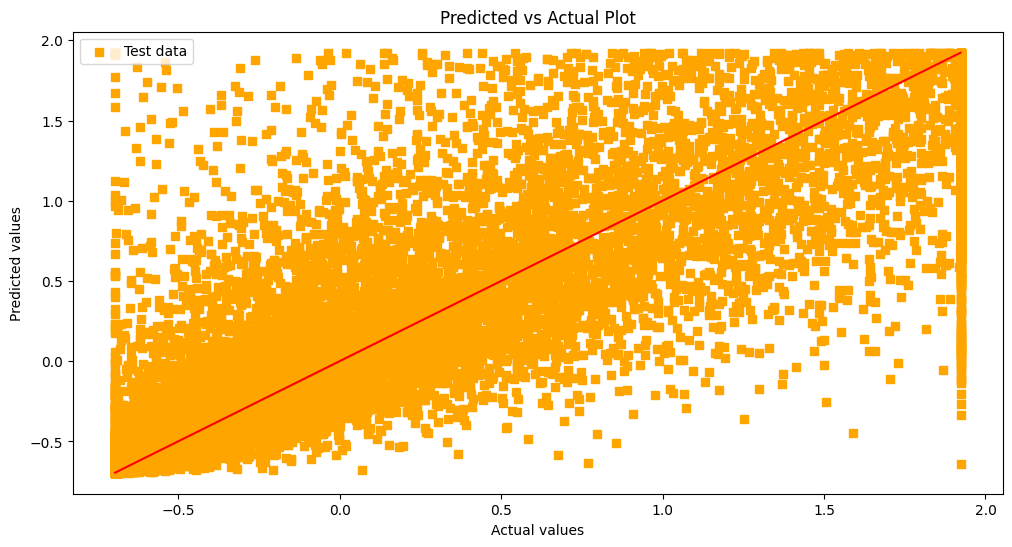

In [ ]:
# Predicted vs Actual plot
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_random_pred, c='orange', marker='s', label='Test data')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.legend(loc='upper left')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red')
plt.title('Predicted vs Actual Plot')
plt.show()

**Support Vector Regressor (SVR)**

In [ ]:
svr = SVR(kernel='linear')

svr.fit(X_train, y_train)

y_svr_pred = svr.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
y_svr_pred

In [ ]:
mse_svr = mean_squared_error(y_test, y_random_pred)

r2_svr = r2_score(y_test, y_random_pred)

print(f'Random Forest - MSE: {mse_svr}, R2: {r2_svr}')

NameError: name 'mean_squared_error' is not defined

**Predicted vs Actual plot**

In [ ]:
# Predicted vs Actual plot
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_svr_pred, c='orange', marker='s', label='Test data')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.legend(loc='upper left')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red')
plt.title('Predicted vs Actual Plot')
plt.show()

## **COMPARISON OF MODELS**

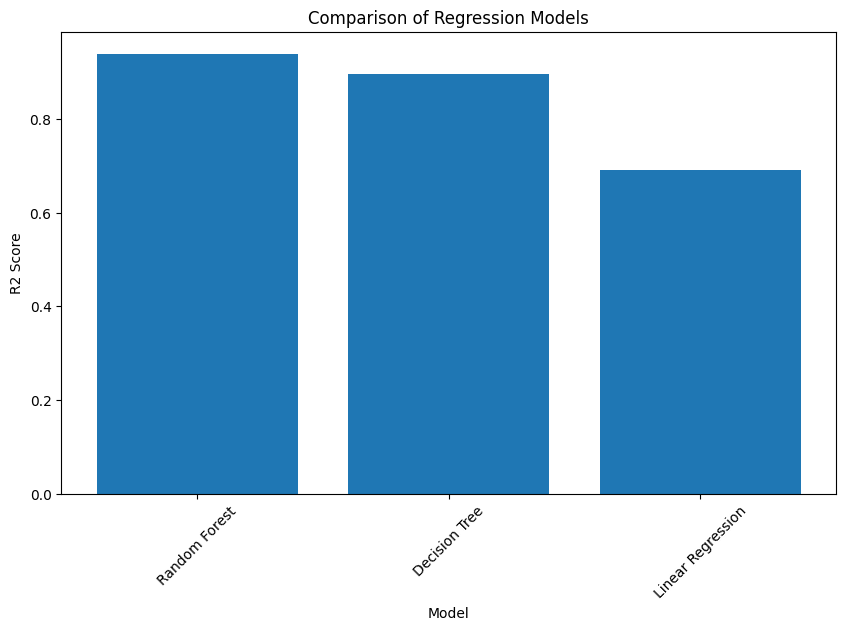

In [ ]:

# Create a dictionary to store model names and their MSE values
models_r2 = {
    "Linear Regression": r2_lr,
    "Decision Tree": r2_dt,
    "Random Forest": r2_rf,
    #"svr" : r2_svr

}

# Sort models by descending order of accuracy
sorted_models_r2 = dict(sorted(models_r2.items(), key=lambda item: item[1],reverse = True))

# Plot the comparison
plt.figure(figsize=(10, 6))
plt.bar(sorted_models_r2.keys(), sorted_models_r2.values())
plt.title('Comparison of Regression Models')
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.xticks(rotation=45)
plt.show()


## **NEW PREDICTIONS**

**Testing for New Inputs**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  int64  
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  int64  
 4   Crop           246091 non-null  int64  
 5   Area           246091 non-null  float64
 6   Production     246091 non-null  float64
dtypes: float64(2), int64(4), object(1)
memory usage: 13.1+ MB


In [ ]:
def val(column_name, target_key):
    # Accessing the encoding mapping for the specified column
    return encoding_mapping[column_name].get(target_key)


In [ ]:
district = val('District_Name','KOTTAYAM')
season = val('Season','Whole Year')
crop = val('Crop','Rice')

In [ ]:
import numpy as np

# Given inputs
#inputs = np.array([State_Name, District_Name, Crop_Year, Season, Crop, Area, Production])
inputs = np.array([district,2024,season,crop,1855])


In [ ]:
new_inputs = scalerx.transform(inputs.reshape(1, -1))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


**Prediction**

In [ ]:
new_pred = random_model.predict(new_inputs).reshape(-1,1)

In [ ]:
n_pred = scalery.inverse_transform(new_pred)

In [ ]:
print("Prediction of Crop Production : ", n_pred[0][0] )

Prediction of Crop Production :  1725.3829000000019
